<a href="https://colab.research.google.com/github/nasirxia/Analysis-Project-2022-Fall/blob/main/lec_14120122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# basic commands
print(2+3)

print(2+8)

print(1==0)

print(False+2)

print(False)

# if else statement

a = 2
if a > 1:
  print(a,"is greater than 1.")
else:
  print(a,"is not greater than 1")

# for loops
fruits = ["apple","banana","cherry"]

for i in fruits:
  print(i)

type(fruits)

for i in range(2):
  for j in range(1+i):
    print(i+j)
#range(2) -> 0,1

# i= 0
# j in range(1)
# j = 0
# print(i+j) -> 0

# i=1
# j in range(2)
# j = 0,1
# print(i+j) -> 1,2

# combining loops and logic
# prime number test

num = int(input("enter an integer greater than 1:"))
print(num)
type(num)
has_facotr = False



# measure time
import time
time_start = time.time()

#enter some code
time_end = time.time()

for i in range(2,num):
  if (num % i)==0:
    has_facotr = True
    break

dur = time_end - time_start

if has_facotr:
  print("It took",dur,"seconds to determine",num,"is not a prime number")
else:
  print("It took",dur,"seconds to determine",num,"is a prime number")










5
10
False
2
False
2 is greater than 1.
apple
banana
cherry
0
1
2
enter an integer greater than 1:22225
22225
It took 0.00011014938354492188 seconds to determine 22225 is not a prime number


  responid  age  gender  edu  income  marital  consumption_rate  \
0        3    2       2    3       1        2                 1   
1        4    2       1    3       1        1                 4   
2        5    2       2    3       1        2                10   
3        6    2       2    4       8        1                15   
4        7    2       2    2       2        1                 3   

   patronage_arbys  patronage_burgerking  patronage_mcd  patronage_subway  \
0              3.0                   3.0            3.0               2.0   
1              2.0                   1.0            2.0               1.0   
2              1.0                   1.0            3.0               1.0   
3              4.0                   1.0            1.0               1.0   
4              2.0                   2.0            2.0               1.0   

   patronage_wendys  rating_arbys  rating_burgerking  rating_mcd  \
0               3.0           NaN                NaN         NaN  

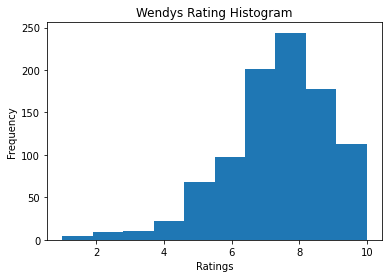

In [69]:
# data import
import pandas as pd
# pandas is a popular data analysis package

data = pd.read_csv('data_wendys.csv')
#print(data)

# first-looking at the data
print(data.head())
print(data.tail())

# clean the data

data_clean = data.dropna( subset = ['edu','income','patronage_wendys','rating_wendys'])
print(data_clean)
# in Python dot '.' is reserved for functions, so conventionally we use 
# underscore '_' to nominate the variables

# data visualization

rating_wendys = data_clean['rating_wendys']
#print(rating_wendys)

rating_wendys.plot.hist()

import matplotlib.pyplot as mpl

mpl.title('Wendys Rating Histogram')
mpl.xlabel('Ratings')
mpl.ylabel('Frequency')

# data analysis

# cross tabulation

# H0: There is no relationship between income and education
# H1: There is

tab = pd.crosstab( data_clean['income'], data_clean['edu'])
print(tab)


# chi square test
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(tab)
print(dof)
print(p)

# t-test
# is wendys patronage different across gender?

# h0: there is no difference
# h1: there is

pat_m = data_clean['patronage_wendys'][ data_clean['gender']==1]
pat_f = data_clean['patronage_wendys'][ data_clean['gender']==2]

print(pat_m.mean())
print(pat_f.mean())

import scipy.stats as sp
print( sp.ttest_ind(pat_m,pat_f) )







In [72]:
# correlation

# correlation is not causility

print(data_clean.columns)

data_rating = data_clean[['rating_arbys','rating_burgerking', 'rating_mcd', 'rating_subway', 'rating_wendys']]

# why apply double square bracket?👆

print(data_rating.corr())





Index(['responid', 'age', 'gender', 'edu', 'income', 'marital',
       'consumption_rate', 'patronage_arbys', 'patronage_burgerking',
       'patronage_mcd', 'patronage_subway', 'patronage_wendys', 'rating_arbys',
       'rating_burgerking', 'rating_mcd', 'rating_subway', 'rating_wendys'],
      dtype='object')
                   rating_arbys  rating_burgerking  rating_mcd  rating_subway  \
rating_arbys           1.000000           0.299633    0.333720       0.363841   
rating_burgerking      0.299633           1.000000    0.403988       0.349774   
rating_mcd             0.333720           0.403988    1.000000       0.349084   
rating_subway          0.363841           0.349774    0.349084       1.000000   
rating_wendys          0.400801           0.366592    0.298576       0.349768   

                   rating_wendys  
rating_arbys            0.400801  
rating_burgerking       0.366592  
rating_mcd              0.298576  
rating_subway           0.349768  
rating_wendys           1